# Comparative Analysis of Anime and Manga Popularity and Reception

## Introduction

This project investigates the question: "Is anime more popular and well-received than manga?" Utilizing a comprehensive dataset from MyAnimeList, which encompasses the top 10,000 anime and manga entries, I aim to shed light on the popularity and reception of these two pivotal forms of Japanese entertainment.

## Context

MyAnimeList is a premier platform for anime and manga enthusiasts, providing a rich repository of user ratings, popularity rankings, and community engagement metrics. The dataset at hand offers a snapshot of the community's preferences and perceptions, capturing scores, popularity ranks, the number of votes, and additional metadata for a vast array of titles.

## Methodologies

To approach our central question, I employed a variety of data science methodologies, meticulously tailored to the nuances of the dataset:

1. **Data Cleaning and Preprocessing**: This step involved streamlining the dataset, ensuring consistency and accuracy by handling missing values and normalizing data for a fair comparative analysis.

2. **Exploratory Data Analysis (EDA)**: I delved into the dataset with an exploratory mindset, utilizing histograms to compare score distributions, and time series analysis to scrutinize score trends over time.

3. **Seasonality Analysis**: Investigating the hypothesis that winter releases may be more popular or highly rated, I segmented the data seasonally and analyzed average scores and popularity.

4. **Lifespan Analysis**: I examined the impact of series duration on their scores and popularity, categorizing series by their lifespan and comparing across these bins.

5. **Comparative Analysis**: I conducted a detailed comparison for titles existing as both anime and manga, focusing on the top 20 entries as ranked by popularity, and examined differences in scores, popularity, and the number of votes.

6. **Statistical Testing**: To ascertain the significance of our observations, I applied t-tests, analyzing whether the observed differences in scores and popularity were statistically significant.

Each step was carefully documented, with rigorous attention to detail and a commitment to unbiased analysis. My findings are presented with clarity and precision, ensuring that readers can easily understand and derive meaningful insights from this study.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime

#Importing datasets
manga_df = pd.read_csv('manga.csv')
anime_df = pd.read_csv('anime.csv')

display(anime_df.head())
display(manga_df.head())

/var/folders/2k/zpwd6v4x71xbykdxkcyd8zvr0000gn/T/ipykernel_47440/523729128.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Title,Score,Vote,Ranked,Popularity,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating
0,Sousou no FrierenFrieren: Beyond Journey's End,9.14,128768,1,508,28,Currently Airing,"Sep 29, 2023 to Mar 2024",Fall 2023,"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...","None found, add some",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older
1,Fullmetal Alchemist: Brotherhood,9.09,2080863,2,3,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity)
2,Steins;Gate,9.07,1375512,3,13,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"['Frontier Works', 'Media Factory', 'Kadokawa ...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older
3,Gintama°Gintama Season 4,9.06,246431,4,337,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"['TV Tokyo', 'Aniplex', 'Dentsu']","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older
4,Shingeki no Kyojin Season 3 Part 2Attack on Ti...,9.05,1545108,5,21,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity)


,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Published,Genres,Themes,Demographics,Serialization,Author
0,Berserk,9.47,334154,1,1,"670,559","123,574",Unknown,Unknown,Publishing,"Aug 25, 1989 to ?","['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...",['Seinen'],Young Animal,"Miura, Kentarou (Story & Art), Studio Gaga (Art)"
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,157522,2,26,"257,957","43,113",24,96,Finished,"Jan 19, 2004 to Apr 19, 2011","['Action', 'Adventure', 'Mystery', 'Supernatur...",[],"['Seinen', 'Shounen']",Ultra Jump,"Araki, Hirohiko (Story & Art)"
2,Vagabond,9.25,138009,3,15,"368,332","40,575",37,327,On Hiatus,"Sep 3, 1998 to May 21, 2015","['Action', 'Adventure', 'Award Winning']","['Historical', 'Samurai']",['Seinen'],Morning,"Inoue, Takehiko (Story & Art), Yoshikawa, Eiji..."
3,One Piece,9.22,368951,4,3,"603,122","115,123",Unknown,Unknown,Publishing,"Jul 22, 1997 to ?","['Action', 'Adventure', 'Fantasy']",[],['Shounen'],Shounen Jump (Weekly),"Oda, Eiichiro (Story & Art)"
4,Monster,9.15,94806,5,29,"238,291","20,674",18,162,Finished,"Dec 5, 1994 to Dec 20, 2001","['Award Winning', 'Drama', 'Mystery']","['Adult Cast', 'Psychological']",['Seinen'],Big Comic Original,"Urasawa, Naoki (Story & Art)"


# Step 1: Preprocessing
## Parsing Date Strings to Create 'start_date' and 'end_date' Columns

In this preprocessing step, I addressed the challenge of converting date strings from the 'Aired' and 'Published' columns into meaningful datetime objects. The goal was to extract the start and end dates for anime and manga series, which would later facilitate my time-based analysis.

I followed these key steps:

1. **Parsing Function**: I defined a `parse_date` function that takes a date string as input and attempts to extract a valid datetime object. This function accommodated various date formats commonly found in the dataset.

2. **Conversion**: I applied the `parse_date` function to the 'Aired' column of the anime dataset, creating 'start_date' and 'end_date' columns. Similarly, I performed the same conversion for the 'Published' column in the manga dataset.

3. **Results Inspection**: To ensure the accuracy of our conversions, I inspected the first few rows of both datasets, displaying the 'Title', original date string, 'start_date', and 'end_date' columns.

This preprocessing step was essential to equip the dataset with temporal information, enabling subsequent analyses related to seasonality, series duration, and trends over time.

In [2]:
# Function to convert date strings to datetime objects
def parse_date(date_str):
    # Check if date_str is a string, otherwise it could be NaN
    if isinstance(date_str, str):
        # Try to match full date (e.g., Jan  19, 2004)
        full_date_match = re.search(r'([A-Za-z]{3,}\s*\d{1,2},\s*\d{4})', date_str)
        if full_date_match:
            return pd.to_datetime(full_date_match.group(), errors='coerce')
        # If full date not found, try to match month and year (e.g., Jan  2004)
        month_year_match = re.search(r'([A-Za-z]{3,}\s*\d{4})', date_str)
        if month_year_match:
            return pd.to_datetime(month_year_match.group(), errors='coerce', format='%b %Y')
        # If month and year not found, try to match year only (e.g., 2004)
        year_match = re.search(r'(\d{4})', date_str)
        if year_match:
            return pd.to_datetime(year_match.group(), errors='coerce', format='%Y')
    # If no date found or date_str is not a string (could be NaN), return NaT
    return pd.NaT

# Apply the function to the 'Aired' nad 'Published' columns to create 'start_date' and 'end_date'
anime_df['start_date'] = anime_df['Aired'].apply(lambda x: parse_date(x.split(' to ')[0]) if pd.notnull(x) else pd.NaT)
anime_df['end_date'] = anime_df['Aired'].apply(lambda x: parse_date(x.split(' to ')[1]) if pd.notnull(x) and ' to ' in x else pd.NaT)

manga_df['start_date'] = manga_df['Published'].apply(lambda x: parse_date(x.split(' to ')[0]) if pd.notnull(x) else pd.NaT)
manga_df['end_date'] = manga_df['Published'].apply(lambda x: parse_date(x.split(' to ')[1]) if pd.notnull(x) and ' to ' in x else pd.NaT)

# Check the results
anime_df[['Title', 'Aired', 'start_date', 'end_date']].head()
manga_df[['Title', 'Published', 'start_date', 'end_date']].head()

,Title,Published,start_date,end_date
0,Berserk,"Aug 25, 1989 to ?",1989-08-25,NaT
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,"Jan 19, 2004 to Apr 19, 2011",2004-01-19,2011-04-19
2,Vagabond,"Sep 3, 1998 to May 21, 2015",1998-09-03,2015-05-21
3,One Piece,"Jul 22, 1997 to ?",1997-07-22,NaT
4,Monster,"Dec 5, 1994 to Dec 20, 2001",1994-12-05,2001-12-20


## Processing and Cleaning

### Combining Anime and Manga Dataframes

- Selected relevant columns ('Title', 'Score', 'Vote', 'Ranked', 'Popularity', 'start_date', and 'end_date') from both anime and manga dataframes.
- Added a new column 'type' to denote the source as either 'anime' or 'manga'.
- Concatenated the dataframes into a single dataframe named 'combined_df'.

### Data Quality Checks

- Checked for null values in the dataset to identify any missing information.
- Examined data types of each column to ensure appropriateness for analysis.
- Computed descriptive statistics to gain an initial understanding of the dataset.
- Identified and displayed duplicate entries to determine if there were any repeated records.

### Handling Duplicates

- Removed duplicate entries while preserving the first occurrence of each duplicate record.
- The final cleaned dataset, 'combined_df', is now ready for in-depth analysis.

In [3]:
# Select only the required columns
anime_concat = anime_df[['Title', 'Score', 'Vote', 'Ranked', 'Popularity', 'start_date', 'end_date']].copy() #Note: Add copy() to avoid the SettingWithCopyWarning
manga_concat = manga_df[['Title', 'Score', 'Vote', 'Ranked', 'Popularity', 'start_date', 'end_date']].copy()

# Add a new column to denote the source
anime_concat['type'] = 'anime'
manga_concat['type'] = 'manga'

# Concatenate the DataFrames
combined_df = pd.concat([anime_concat, manga_concat], ignore_index=True)
combined_df.head()


,Title,Score,Vote,Ranked,Popularity,start_date,end_date,type
0,Sousou no FrierenFrieren: Beyond Journey's End,9.14,128768,1,508,2023-09-29,2024-03-01,anime
1,Fullmetal Alchemist: Brotherhood,9.09,2080863,2,3,2009-04-05,2010-07-04,anime
2,Steins;Gate,9.07,1375512,3,13,2011-04-06,2011-09-14,anime
3,Gintama°Gintama Season 4,9.06,246431,4,337,2015-04-08,2016-03-30,anime
4,Shingeki no Kyojin Season 3 Part 2Attack on Ti...,9.05,1545108,5,21,2019-04-29,2019-07-01,anime


In [4]:
#Check for null values, data types, and duplicates
print(combined_df.isnull().sum())
print()
print(combined_df.dtypes)
print()
print(combined_df.describe())
print()
print(combined_df.duplicated().sum())

Title            0
Score            0
Vote             0
Ranked           0
Popularity       0
start_date     121
end_date      7127
type             0
dtype: int64

Title                 object
Score                float64
Vote                   int64
Ranked                 int64
Popularity             int64
start_date    datetime64[ns]
end_date      datetime64[ns]
type                  object
dtype: object

              Score          Vote        Ranked   Popularity  \
count  20000.000000  2.000000e+04  20000.000000  20000.00000   
mean       7.395365  4.445922e+04   3751.264600   6329.09520   
min        6.800000  1.000000e+02      1.000000      1.00000   
25%        7.080000  6.970000e+02   1668.000000   1980.75000   
50%        7.300000  3.168500e+03   3335.000000   4580.50000   
75%        7.610000  2.245200e+04   4999.000000   8991.00000   
max        9.470000  2.745016e+06  10060.000000  32962.00000   
std        0.414625  1.476954e+05   2602.461531   5751.09401   

          

In [5]:
# Find and display duplicates
duplicates = combined_df[combined_df.duplicated()]
display(duplicates)

# Remove duplicates, keeping the first occurrence
combined_df = combined_df.drop_duplicates(subset=['Title', 'Score', 'Ranked', 'Popularity', 'type'], keep='first')
combined_df.reset_index(drop=True, inplace=True)

print()
combined_df.shape

,Title,Score,Vote,Ranked,Popularity,start_date,end_date,type
1950,3-nen Z-gumi Ginpachi-sensei Announcement Special,7.45,859,1951,11467,2023-03-19,NaT,anime
2347,Mato Seihei no SlaveChained Soldier,7.32,4079,2523,2226,2024-01-04,NaT,anime
4185,Emo FazeLaw of Devil,7.00,165,4131,13500,2023-09-29,NaT,anime
5001,Fullmetal Alchemist: Brotherhood,9.09,2080863,2,3,2009-04-05,2010-07-04,anime
5002,Steins;Gate,9.07,1375512,3,13,2011-04-06,2011-09-14,anime
...,...,...,...,...,...,...,...,...
9917,Gi(a)rlish NumberGirlish Number,6.82,36153,4917,2001,2016-10-07,2016-12-23,anime
9918,Hakaima SadamitsuSadamitsu the Destroyer,6.82,2390,4918,7705,2001-01-17,2001-03-21,anime
9922,Ichigo 100%: Koi ga Hajimaru?! Satsuei Gasshuk...,6.82,10097,4922,4861,2004-09-23,NaT,anime
9928,Touch: Cross Road - Kaze no Yukue,6.82,1666,4928,9299,2001-02-09,NaT,anime


(17734, 8)

# Step 2: Exploratory Data Analysis (EDA)
## Distribution of Scores - Anime vs. Manga

In this section of the analysis, I explore the distribution of scores for both anime and manga to gain insights into their reception by the MyAnimeList community.

### Code Explanation

I used Python's Matplotlib library to create histograms that visualize the distribution of scores for anime and manga. The code can be summarized as follows:

- Filter the 'combined_df' dataframe to separate anime and manga score data.
- Remove rows where the 'Score' column has missing values (NaN) to ensure accuracy.
- Two separate datasets, 'anime_scores' and 'manga_scores', are created, each containing the 'Score' column for their respective type ('anime' or 'manga').
- Specify the number of bins (20) for the histogram and set the transparency (alpha) for better visualization.
- Two histograms are plotted on the same graph: one for anime scores and another for manga scores.
- The plot includes a title, labels for the x and y axes, a legend to distinguish between anime and manga, and grid lines for clarity.

### Observations

- There's more manga in the combined dataset
- The manga didn't fall too far below the 7.0 score threshold, meaning that there could be more higher ranked manga in the dataset.
- It appears that the distribution of anime series with scores above 9.0 is slightly higher than that of manga series.

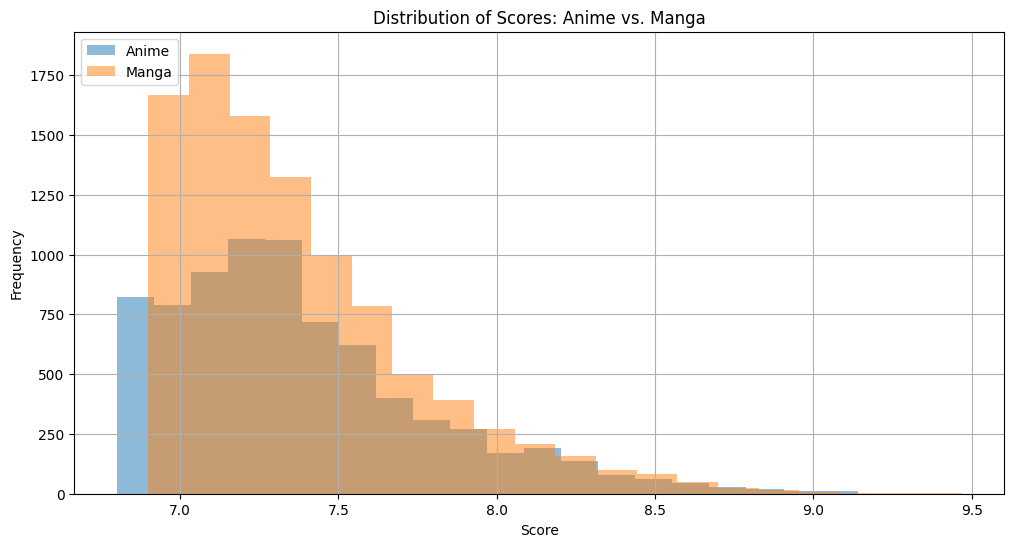

In [6]:
# Filter out rows where score is not available (NaN)
anime_scores = combined_df[(combined_df['type'] == 'anime') & combined_df['Score'].notna()]['Score']
manga_scores = combined_df[(combined_df['type'] == 'manga') & combined_df['Score'].notna()]['Score']

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for anime scores
plt.hist(anime_scores, bins=20, alpha=0.5, label='Anime')

# Histogram for manga scores
plt.hist(manga_scores, bins=20, alpha=0.5, label='Manga')

plt.title('Distribution of Scores: Anime vs. Manga')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Seasonality Analysis: Anime vs. Manga

In this section of the analysis, I investigate the seasonality of anime and manga releases to understand how their reception varies across different seasons. I use a function to determine the season from the month of the series start date and calculate seasonal statistics for both anime and manga.

### Code Explanation

#### Season Determination Function

`get_season`: maps each month to a season (Winter, Spring, Summer, or Fall). This function will help categorize series based on their start dates.

#### Seasonal Analysis Function

`calculate_seasonal_stats`: calculates seasonal statistics for a given media type (anime or manga).

### Observations

#### Anime Seasonal Stats
- Overall, there doesn't seem to be much variability in scores or popularity between seasons. This was actually quite surprising to me because I hypothesized that Winter was going to be the season with the best anime (this was based on my own personal anime favorites), but Winter anime had the lowest scores and popularity (the higher the popularity sum, the less popular the season is; popularity is a rank in our dataset) overall. This could also be due to the fact that the 2024 Winter anime season is not complete yet, but it is still interesting to note.

#### Manga Seasonal Stats
- Our findings for manga tell the same story. Winter performed slightly worse here, but the average score is still relatively close to the other seasons. The difference in popularity is a bit more noteworthy, however.

In [7]:
# Define a function to determine the season from the month
def get_season(month):
    if month >= 1 and month <= 3:
        return 'Winter'
    elif month >= 4 and month <= 6:
        return 'Spring'
    elif month >= 7 and month <= 9:
        return 'Summer'
    else:
        return 'Fall'

# Ensure 'start_date' is a datetime object
combined_df['start_date'] = pd.to_datetime(combined_df['start_date'], errors='coerce')

# Drop rows where start_date is NaT
combined_df = combined_df.dropna(subset=['start_date'])

# Extract month from start_date
# Function to calculate seasonal average score and popularity
def calculate_seasonal_stats(df, media_type):
    # Filter the DataFrame by type (anime or manga)
    media_df = df[df['type'] == media_type].copy()
    
    # Extract month from start_date
    media_df['month'] = media_df['start_date'].dt.month

    # Apply the function to get the season
    media_df['season'] = media_df['month'].apply(get_season)

    # Group by season and calculate the average score and popularity
    seasonal_scores = media_df.groupby('season')['Score'].mean().reset_index()
    seasonal_popularity = media_df.groupby('season')['Popularity'].mean().reset_index()

    # Merge the results
    seasonal_analysis = pd.merge(seasonal_scores, seasonal_popularity, on='season')

    # Sort by average score and popularity to see which season ranks highest
    seasonal_analysis.sort_values(by=['Score', 'Popularity'], ascending=[False, True], inplace=True)

    return seasonal_analysis



# Calculate for anime
anime_seasonal_stats = calculate_seasonal_stats(combined_df, 'anime')

# Calculate for manga
manga_seasonal_stats = calculate_seasonal_stats(combined_df, 'manga')

display(anime_seasonal_stats, manga_seasonal_stats)

,season,Score,Popularity
0,Fall,7.386040,4055.362379
1,Spring,7.383453,4125.443135
2,Summer,7.366139,4095.859513
3,Winter,7.362183,4469.211634


,season,Score,Popularity
0,Fall,7.391978,8365.305908
1,Spring,7.390756,8156.178603
2,Summer,7.383849,8434.059243
3,Winter,7.333926,9447.267574


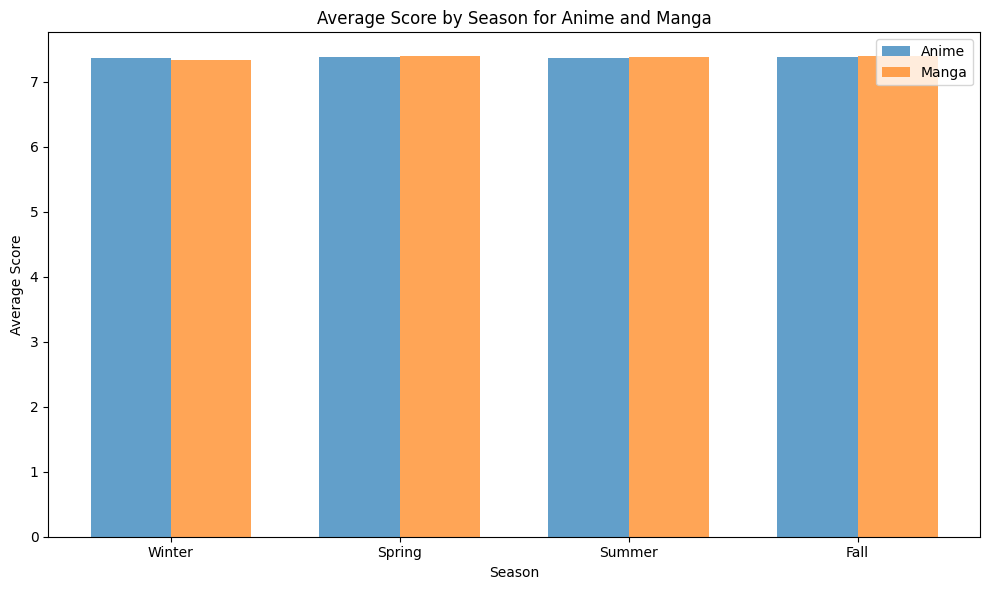

In [8]:
# Make sure both DataFrames are sorted by 'season' in the same order
order = ['Winter', 'Spring', 'Summer', 'Fall']
anime_seasonal_stats['season'] = pd.Categorical(anime_seasonal_stats['season'], categories=order, ordered=True)
manga_seasonal_stats['season'] = pd.Categorical(manga_seasonal_stats['season'], categories=order, ordered=True)
anime_seasonal_stats.sort_values('season', inplace=True)
manga_seasonal_stats.sort_values('season', inplace=True)

# Set the positions and width for the bars
pos = np.arange(len(anime_seasonal_stats))
bar_width = 0.35

# Plotting
plt.figure(figsize=(10, 6))
anime_bars = plt.bar(pos - bar_width/2, anime_seasonal_stats['Score'], bar_width, label='Anime', alpha=0.7)
manga_bars = plt.bar(pos + bar_width/2, manga_seasonal_stats['Score'], bar_width, label='Manga', alpha=0.7)

plt.xlabel('Season')
plt.ylabel('Average Score')
plt.title('Average Score by Season for Anime and Manga')
plt.xticks(pos, anime_seasonal_stats['season'])
plt.legend()
plt.tight_layout()
plt.show()

## Yearly Analysis: Average Score Comparison - Anime vs. Manga

In this section, I analyze and compare the yearly average scores of anime and manga series over time. The code below generates a line graph that illustrates how the average scores evolve from year to year.

### Observations
- Even though the changes aren't incredibly significant (remember, this dataset only comprises the top 10,000 manga and top 10,000 anime), it is still interesting to see that anime and manga have both generally improved over time.
- Even though anime and manga have both generally trended upward over time, there are some noteworthy years for both types of series:
    - Anime:
        - 1971: This could be due to the fact that Lupin III was released this year
        - 1977 to 1980: The Rose of Versailles, Lupin III: The Castle of Cagliostro, Future Boy Conan, Ashita no Joe 2, just to name a few
    - Manga:
        - 1966: Hi no Tori (Bird of Fire/Phoenix)
        - 1982: Akira and Legend of the Galactic Heroes, enough said.

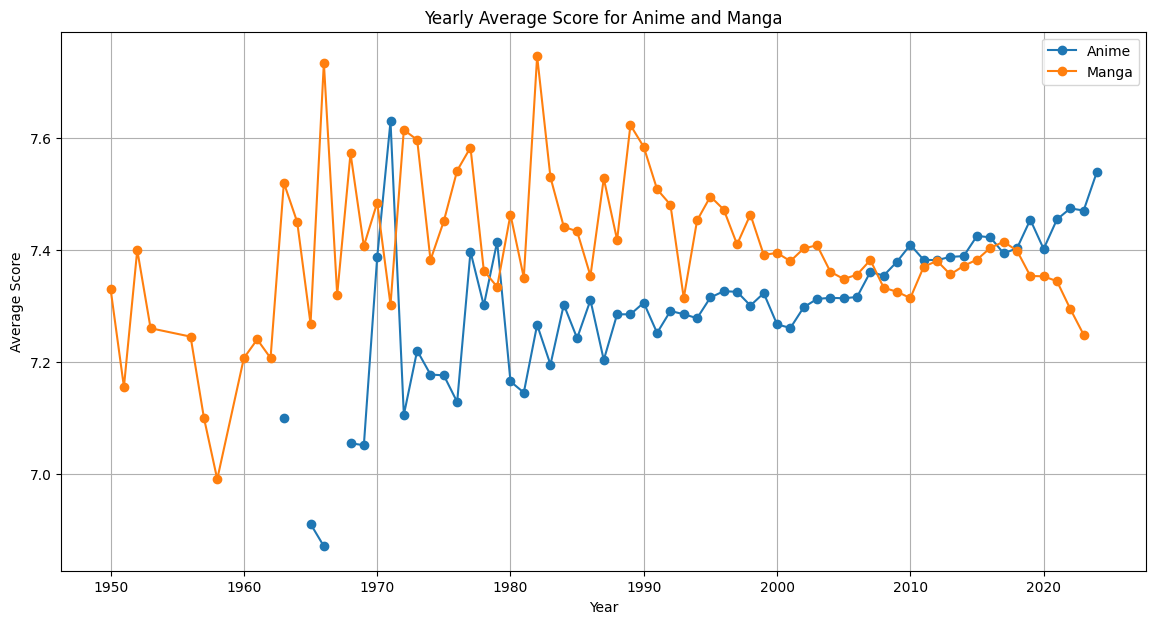

In [9]:
import matplotlib.pyplot as plt

# Ensure 'start_date' is a datetime object
combined_df['start_date'] = pd.to_datetime(combined_df['start_date'], errors='coerce')

# Extract year from 'start_date'
combined_df['year'] = combined_df['start_date'].dt.year

# Drop rows where year or score is NaT or NaN
combined_df = combined_df.dropna(subset=['year', 'Score'])

# Group by year and type, then calculate average score
yearly_scores = combined_df.groupby(['year', 'type'])['Score'].mean().reset_index()

# Pivot the data for easy plotting
yearly_scores_pivoted = yearly_scores.pivot(index='year', columns='type', values='Score')

# Plot line graph
plt.figure(figsize=(14, 7))
for media_type in yearly_scores_pivoted.columns:
    plt.plot(yearly_scores_pivoted.index, yearly_scores_pivoted[media_type], marker='o', label=media_type.capitalize())

plt.xlabel('Year')
plt.ylabel('Average Score')
plt.title('Yearly Average Score for Anime and Manga')
plt.legend()
plt.grid(True)
plt.show()

## Lifespan Analysis: Average Score and Popularity by Series Lifespan

In this section, I perform an analysis to determine how the lifespan of anime and manga series relates to their average scores and popularity. I categorize series into different lifespan categories and visualize their average scores and popularity using bar graphs.

### Lifespans
  - 0-3 months: Series that lasted up to 3 months
  - 4-12 months: Series that lasted 4 to 12 months
  - 1-3 years: Series that lasted 1 to 3 years
  - Greater than 3 years: Series that lasted more than 3 years

### Observations

- In terms of scores, everything is fairly similar. Again, this is because this dataset only comprises the top 10,000 anime and top 10,000 manga. If we introduced all anime and all manga into the dataset, we'd be able to see how the plethora of abysmal anime and manga that exist (looking at you, Redo of Healer) affects our data. However, this is computationally expensive, so we're using the top 10,000 of each type of series for now.

- Popularity is where things get interesting. It seems like the sweet spot for anime is 1-3 years and the sweet spot for manga is 4-12 months. For anime, this includes series like 'Fullmetal Alchemist: Brotherhood', 'Monster', and 'Hunter x Hunter'. For manga, this includes series like 'The Garden of Sinners' and 'Katanagatari'.


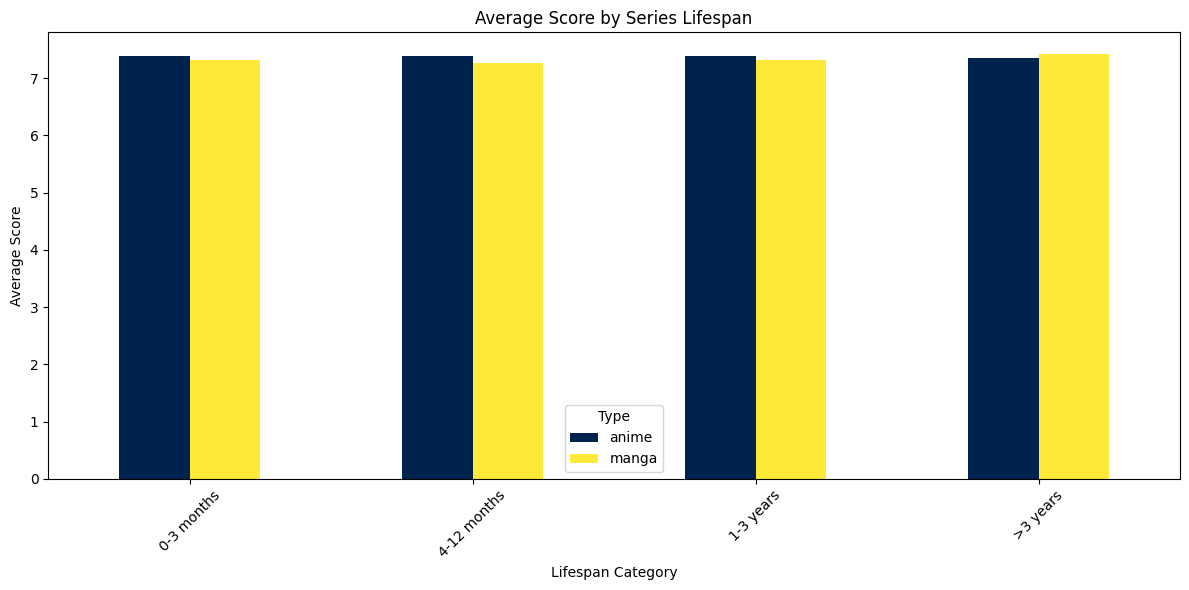

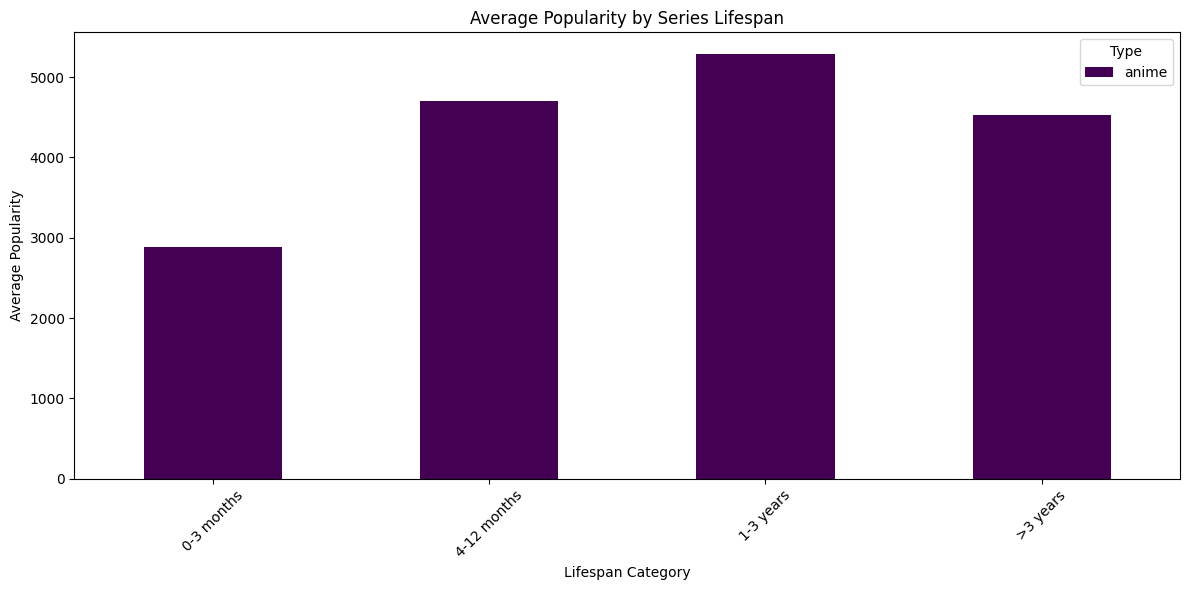

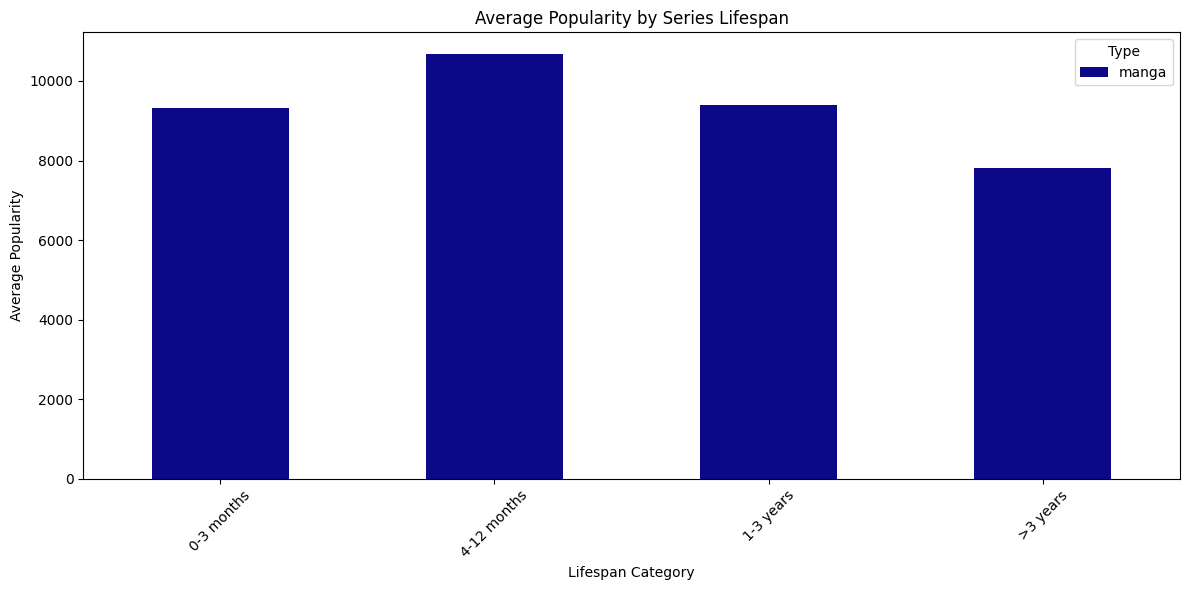

In [10]:
combined_df = combined_df.copy()

# Replace NaT in 'end_date' with the current date for ongoing series
combined_df['end_date'] = combined_df['end_date'].fillna(pd.to_datetime('today'))

# Calculate the lifespan of the series in days
combined_df['lifespan'] = (combined_df['end_date'] - combined_df['start_date']).dt.days

# Define bins for the lifespan categories
bins = [0, 3*30, 12*30, 3*365, np.inf]  # Bins defined in days
labels = ['0-3 months', '4-12 months', '1-3 years', '>3 years']

# Bin the lifespan data
combined_df['lifespan_category'] = pd.cut(combined_df['lifespan'], bins=bins, labels=labels)

# Group by lifespan category and type, and calculate average score and popularity
lifespan_scores = combined_df.copy().groupby(['lifespan_category', 'type'], observed=True)['Score'].mean().unstack()
lifespan_popularity = combined_df.copy().groupby(['lifespan_category', 'type'], observed=True)['Popularity'].mean().unstack()

# Plot average scores by lifespan category
lifespan_scores.plot(kind='bar', figsize=(12, 6), colormap='cividis')
plt.title('Average Score by Series Lifespan')
plt.xlabel('Lifespan Category')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# Plot average popularity by lifespan category
lifespan_popularity['anime'].plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Average Popularity by Series Lifespan')
plt.xlabel('Lifespan Category')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

# Plot average popularity by lifespan category
lifespan_popularity['manga'].plot(kind='bar', figsize=(12, 6), colormap='plasma')
plt.title('Average Popularity by Series Lifespan')
plt.xlabel('Lifespan Category')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

## Comparative Analysis: Anime vs. Manga with Matching Titles

In this section, I conduct a comparative analysis to identify anime series that share the same title as a manga. I then analyze the differences in scores and popularity between these anime and manga pairs.

### Observations

- Aside from Steins;Gate and Jujutsu Kaisen, people tend to like the manga versions more. However, it makes sense that the reception of these two anime shows is higher. The animation in Jujutsu Kaisen is known for being exceptional, and the voice acting in Steins;Gate really brings the characters to life in a way that the lines of text in the manga cannot (i.e. Hououin Kyouma's laugh).

- I found it hilarious that Sword Art Online and Tokyo Ghoul had the largest disparities in their anime and manga scores. Tokyo Ghoul's anime deviated greatly from the manga, and fans were quite unhappy about this. And Sword Art Online's anime tends to be the object of ridicule and memes (whether deserved or not) throughout the anime community.

In [11]:
# Split the data into anime and manga DataFrames
anime_df = combined_df[combined_df['type'] == 'anime'].copy()
manga_df = combined_df[combined_df['type'] == 'manga'].copy()

# Normalize titles to improve matching
anime_df['normalized_title'] = anime_df['Title'].str.lower().str.strip()
manga_df['normalized_title'] = manga_df['Title'].str.lower().str.strip()

# Find matching titles
matched_titles_df = anime_df.merge(manga_df, on='normalized_title', suffixes=('_anime', '_manga'))

# Filter to keep only the columns we're interested in
matched_titles_df = matched_titles_df[['Title_anime', 'Score_anime', 'Popularity_anime', 'Vote_anime',
                                       'Title_manga', 'Score_manga', 'Popularity_manga', 'Vote_manga']]

matched_titles_df.drop_duplicates(subset=['Title_anime', 'Score_anime', 'Vote_anime'], inplace=True)

# Rank the anime by popularity and select the top 20
top_20_anime = matched_titles_df.nsmallest(20, 'Popularity_anime')

top_20_anime

,Title_anime,Score_anime,Popularity_anime,Vote_anime,Title_manga,Score_manga,Popularity_manga,Vote_manga
12,Death Note,8.62,2,2696520,Death Note,8.69,13,223603
341,Sword Art Online,7.20,5,2118375,Sword Art Online,7.99,252,23769
79,Naruto,7.99,8,1939112,Naruto,8.07,11,268726
128,Tokyo Ghoul,7.79,9,1836426,Tokyo Ghoul,8.52,5,267904
0,Steins;Gate,9.07,13,1375512,Steins;Gate,8.52,1540,3176
13,Jujutsu Kaisen,8.62,16,1586150,Jujutsu Kaisen,8.53,12,175332
8,One Piece,8.71,19,1297946,One Piece,9.22,3,368951
60,Toradora!,8.07,23,1361949,Toradora!,8.24,646,8000
215,Akame ga Kill!,7.47,29,1288956,Akame ga Kill!,7.83,46,85161
20,Mob Psycho 100,8.49,31,1246395,Mob Psycho 100,8.61,109,45349


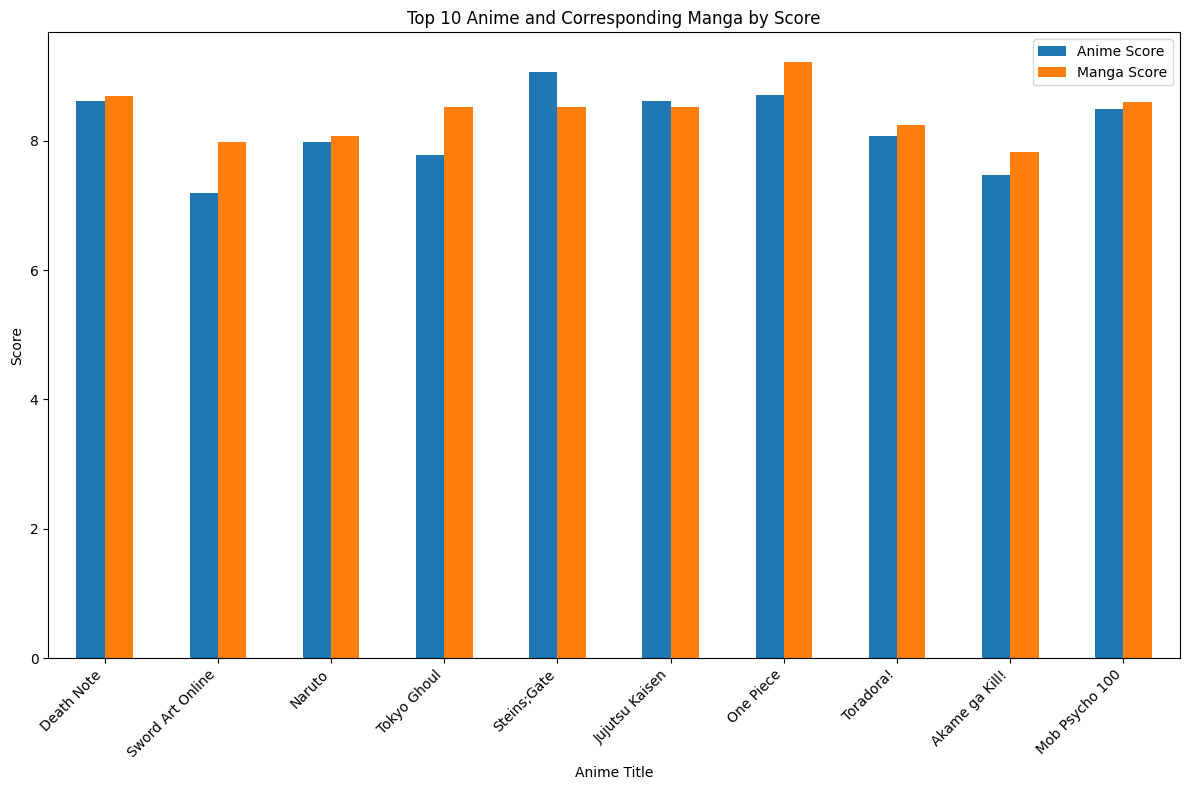

In [12]:
# Visualization of the top 10 anime and manga pairs based on anime popularity
top_10_anime = top_20_anime.head(10)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Set the index to the anime title for better x-axis labels
top_10_anime.set_index('Title_anime', inplace=True)

# Create bar chart
top_10_anime[['Score_anime', 'Score_manga']].plot(kind='bar', ax=ax)

# Set titles and labels
ax.set_title('Top 10 Anime and Corresponding Manga by Score')
ax.set_xlabel('Anime Title')
ax.set_ylabel('Score')
ax.legend(['Anime Score', 'Manga Score'])

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 3: Statistical Testing: Is Anime More Popular than Manga?

In this section, we finally answer the initial question posed in this study. And we will answer it with statistics. The aim is to determine if there are significant differences between these two media formats.

### Context

- The t-tests provide statistical results with two important values: the test statistic and the p-value.
- The test statistic measures the difference in means between the two groups (anime and manga) relative to the spread or variance within each group.
- The p-value assesses the likelihood of obtaining the observed results (or more extreme) under the null hypothesis that there is no difference between anime and manga.
- For the score comparison, a p-value below a certain significance level (e.g., 0.05) suggests that there is a significant difference in scores between anime and manga. The exact significance level depends on your chosen threshold for statistical significance.

### Observations
- First of all, there's no significant difference in 'Score' for anime and manga. The p-value is high for this metric.

- However, the p-value for 'Vote' (which is the metric I used for popularity in this particular statistical test) is very low. With such a small p-value, we can confidently reject the null hypothesis that there's no difference in the number of votes for anime and manga in the dataset.

- The t-statistic is positive and quite large (33.896), which indicates that anime, on average, has a higher number of votes than manga. This suggests that anime may be engaging a larger audience to the extent that more users are motivated to vote on anime compared to manga.

#### Here are some insights and considerations from this result:

- Engagement: A higher number of votes for anime could imply greater engagement or a larger audience for anime on the platform from which the data was collected.

- Visibility: Anime might have more visibility or be more accessible than manga, leading to a higher number of users scoring and voting for them.

- Sample Size and Effect Size: While the statistical significance is clear due to the very small p-value, the practical significance also seems to be substantial, given the large t-statistic. This indicates a considerable difference between the groups, not just a statistical artifact of a large sample size.

- User Behavior: This difference in the number of votes might reflect user behavior and preferences on the platform. Users might be more inclined to vote for anime, perhaps due to the medium's nature (e.g., visual and auditory content might elicit more immediate reactions than text).

In conclusion, both the popularity ranks and the number of votes suggest that anime is more popular than manga among users on the platform, with anime not only ranking higher in popularity but also receiving more votes overall. 

### This supports the notion that anime is indeed more popular than manga!

In [13]:
from scipy import stats

# Assuming anime_scores and manga_scores are Series containing the scores of anime and manga
anime_scores = combined_df[combined_df['type'] == 'anime']['Score']
manga_scores = combined_df[combined_df['type'] == 'manga']['Score']

# Assuming anime_popularity and manga_popularity are Series containing the popularity of anime and manga
anime_popularity = combined_df[combined_df['type'] == 'anime']['Vote']
manga_popularity = combined_df[combined_df['type'] == 'manga']['Vote']

# Perform t-tests
score_ttest = stats.ttest_ind(anime_scores.dropna(), manga_scores.dropna(), equal_var=False)
popularity_ttest = stats.ttest_ind(anime_popularity.dropna(), manga_popularity.dropna(), equal_var=False)

score_ttest, popularity_ttest

(TtestResult(statistic=0.5731839489604033, pvalue=0.5665282589271455, df=15896.446847095425),
 TtestResult(statistic=33.89671248165079, pvalue=4.240417358049442e-235, df=7812.565292353783))